## Backend

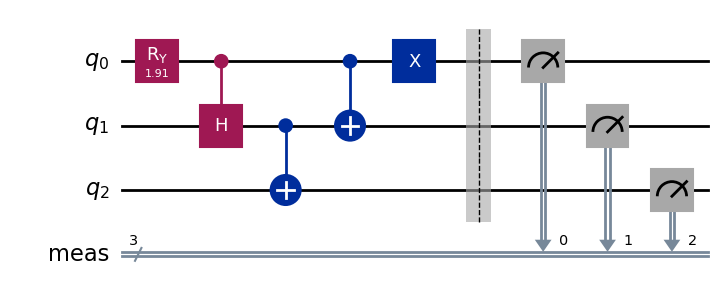

In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
import matplotlib.pyplot as plt
import numpy as np

def qc_shot():  
    # get result
    job_sampler = sampler.run([pub], shots=1)
    result_sampler = job_sampler.result()
    counts_sampler = result_sampler[0].data.meas.get_counts()

    return counts_sampler 

def map_choice(choice):
    if choice == 0 or choice == {'100': 1}:
        return 'Rock'
    elif choice == 1 or choice == {'010': 1}:
        return 'Paper'
    else:
        return 'Scissors'

def map_q_choice(choice):
    if choice == 0 or choice == {'100': 1}:
        return 0
    elif choice == 1 or choice == {'010': 1}:
        return 1
    else:
        return 2

def find_winner(user, qc):
    if user == qc:
        return 'TIE'
    elif (user == 0 and qc == 2) or (user == 1 and qc == 0) or (user == 2 and qc == 1):
        return 'YOU WIN'
    else:
        return 'YOU LOSE'

# create circuit        
qc = QuantumCircuit(3)
sampler = StatevectorSampler()
pub = (qc)

qc.ry(np.arccos(-1/3), 0)
qc.ch(0, 1)        
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)
qc.measure_all()

qc.draw('mpl')

## Frontend

In [3]:
user_choice = -1

while user_choice == -1:
    user_input = input('Enter choice (rock, paper, scissors): ').lower()
    
    if user_input == 'rock':
        user_choice = 0
    elif user_input == 'paper':
        user_choice = 1
    elif user_input == 'scissors':
        user_choice = 2

# find and dispaly result
qc_choice = map_q_choice(qc_shot())
print()
print(f"You chose: {map_choice(user_choice)}")
print(f"Quantum computer chose: {map_choice(qc_choice)}")
print()
print(find_winner(user_choice, qc_choice))

Enter choice (rock, paper, scissors):  Paper



You chose: Paper
Quantum computer chose: Scissors

YOU LOSE


## Probability test

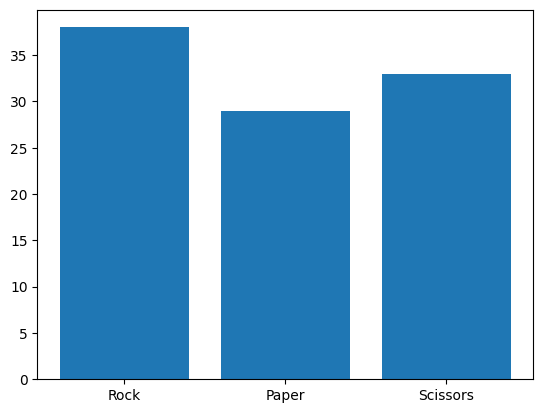

In [4]:
R, P, S = 0, 0, 0

for _ in range(100):
    value = qc_shot()
    if value == {'100': 1}:
        R+=1
    elif value == {'010': 1}:
        P+=1
    else:
        S+=1

labels = ['Rock', 'Paper', 'Scissors']
counts = (R, P, S)

plt.bar(labels, counts)
plt.show()